# Import Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import time
import numpy as np
import re
import pandas as pd
import math   
import json

from selenium import webdriver
from selenium.webdriver import Firefox, Chrome, Edge
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.chrome.options import Options

from IPython.display import Image
from IPython.core.display import HTML 
# pip install lxml
# !pip list
# !pip uninstall -y lxml

# Web Scraping

## DrugBank Online
- https://go.drugbank.com/drugs

Image 1: Total drugs
---
- N = 2,738 (22 / feb / 2023)
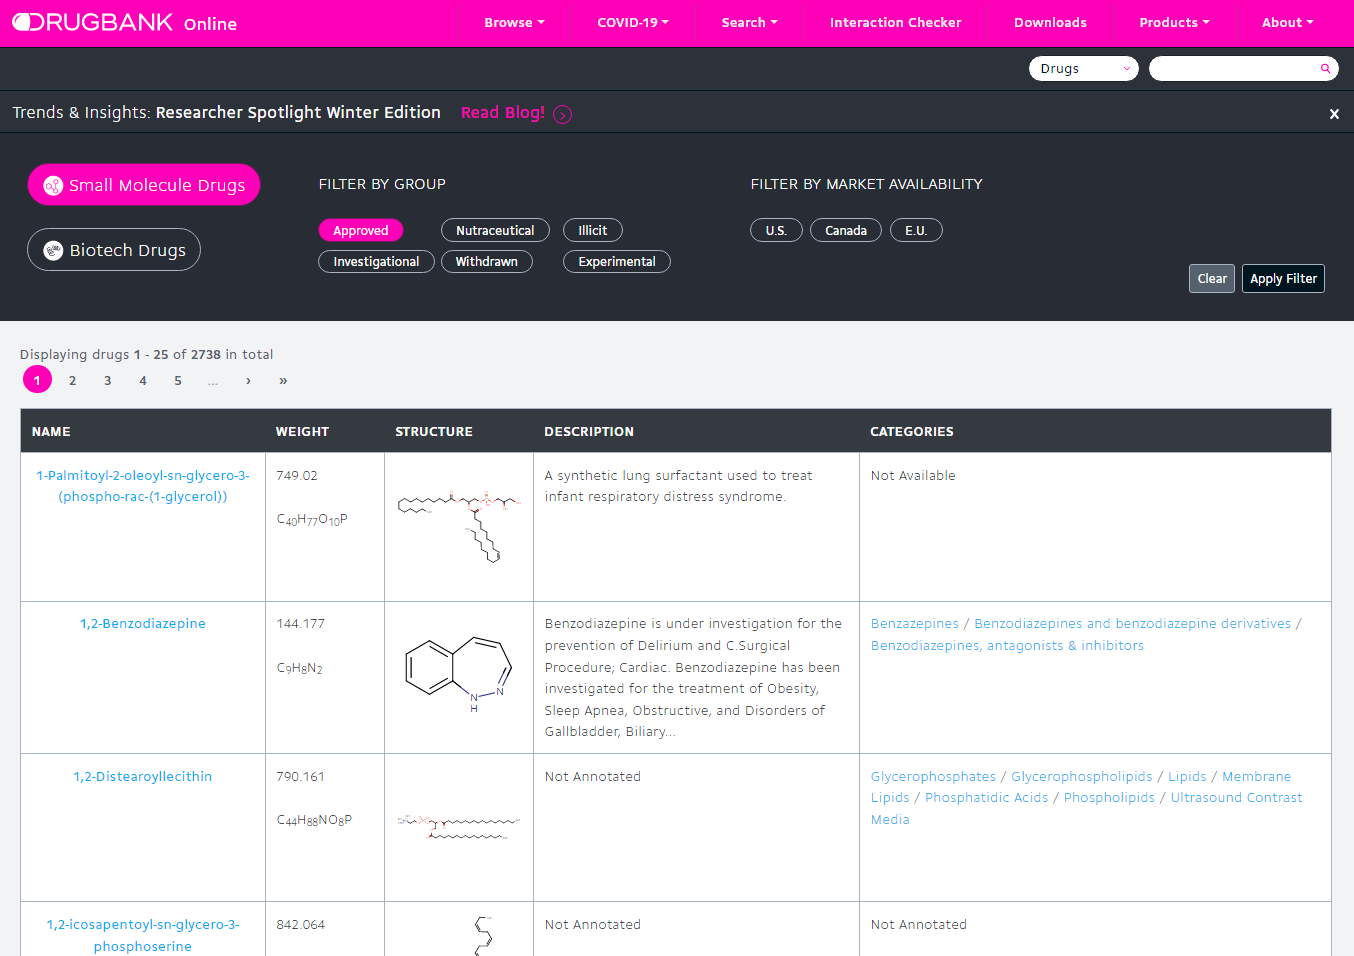

Image 2: In Drug
---
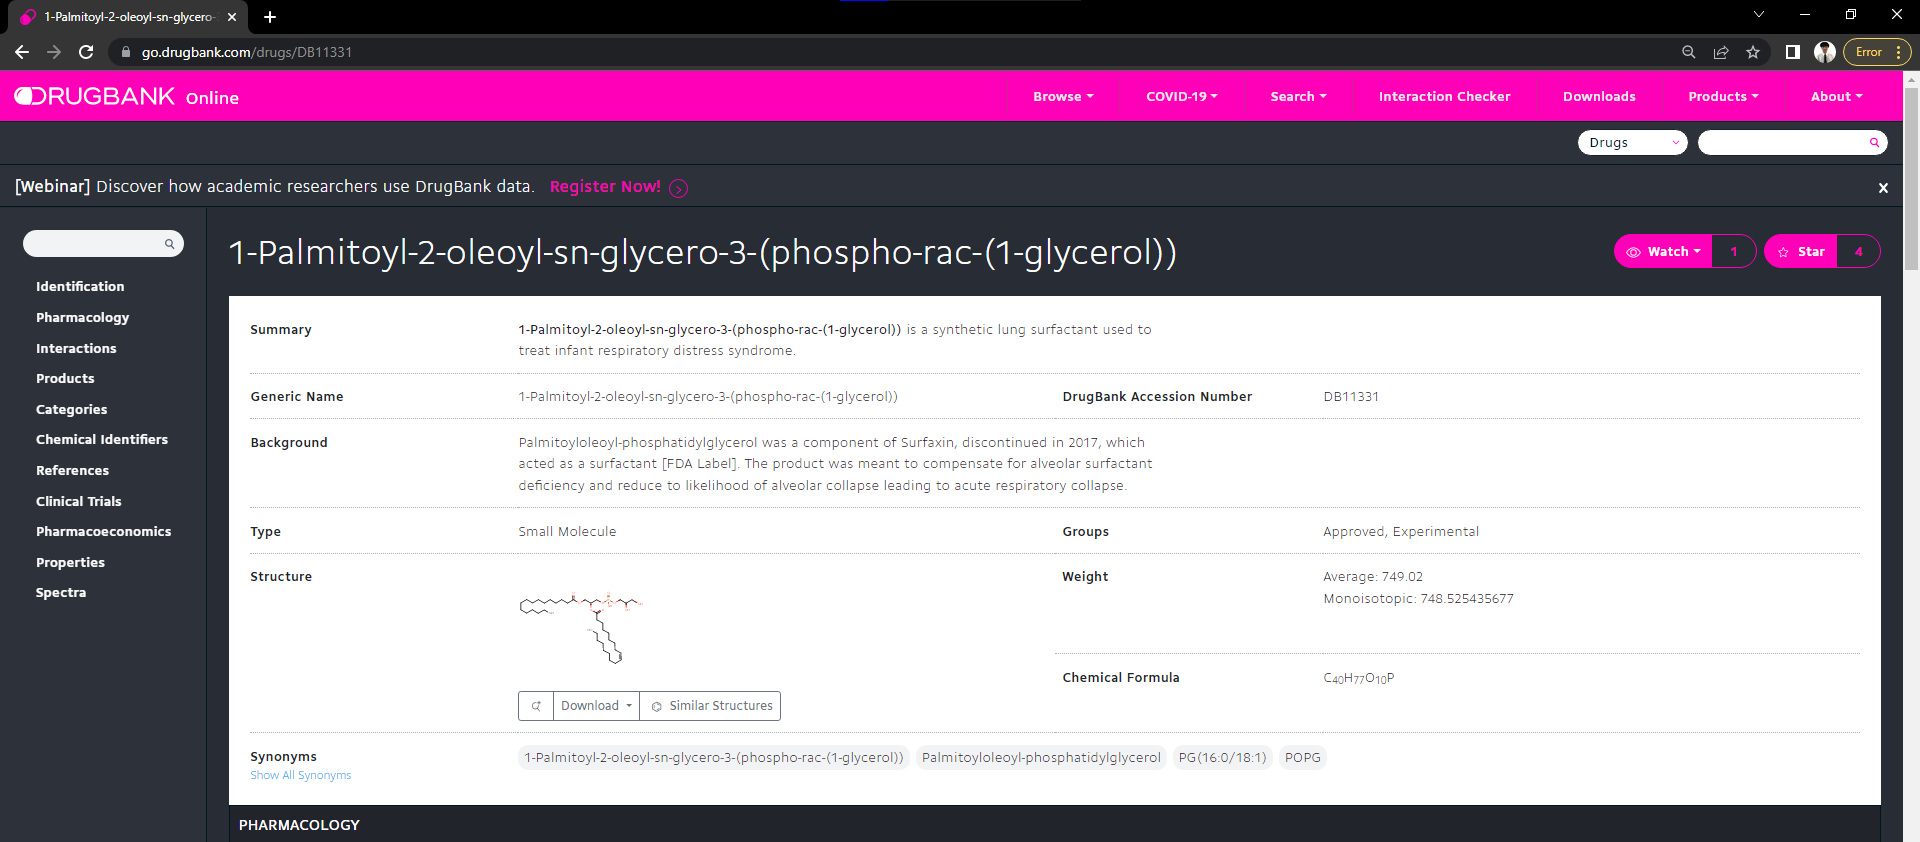

Looks like URL path change by 'DrugBank Accession Numbers'
---
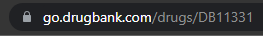


## Retrive Data All Pages

In [2]:
%%time
# Drug Names
dr_ns = []
# DrugBank Accession Numbers
dr_bans = []

page = 1
while page <= 110:
    url = "https://go.drugbank.com/drugs?approved=1&c=name&d=up&page="+str(page)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "html.parser")

    drugs = soup.find_all(
    'td', {'class': 'name-value text-sm-center drug-name'})
    
    for dr in drugs:
        dr_ns.append(dr.text)
        ban = (dr.find('a').get("href").split('/')[2])
        dr_bans.append(ban)
    range_ = [n for n in range(101)[1::20]]
    if page in range_:
        print("Completed Scraping:", page)
    page += 1

Completed Scraping: 1
Completed Scraping: 21
Completed Scraping: 41
Completed Scraping: 61
Completed Scraping: 81
CPU times: total: 4.95 s
Wall time: 1min 4s


## Convert to Pandas dataFrame

In [3]:
test_df = pd.DataFrame([dr_ns,dr_bans]).T

In [4]:
test_df

,0,1
0,1-Palmitoyl-2-oleoyl-sn-glycero-3-(phospho-rac...,DB11331
1,"1,2-Benzodiazepine",DB12537
2,"1,2-Distearoyllecithin",DB14099
3,"1,2-icosapentoyl-sn-glycero-3-phosphoserine",DB14096
4,2-mercaptobenzothiazole,DB11496
...,...,...
2734,Zopiclone,DB01198
2735,Zotepine,DB09225
2736,Zucapsaicin,DB09120
2737,Zuclopenthixol,DB01624


In [5]:
test_df.columns = ['Name','DrugBankAccessionNumber']

In [6]:
test_df

,Name,DrugBankAccessionNumber
0,1-Palmitoyl-2-oleoyl-sn-glycero-3-(phospho-rac...,DB11331
1,"1,2-Benzodiazepine",DB12537
2,"1,2-Distearoyllecithin",DB14099
3,"1,2-icosapentoyl-sn-glycero-3-phosphoserine",DB14096
4,2-mercaptobenzothiazole,DB11496
...,...,...
2734,Zopiclone,DB01198
2735,Zotepine,DB09225
2736,Zucapsaicin,DB09120
2737,Zuclopenthixol,DB01624


---
# Testing
- **Objective**
    - To get data requirement in different data types:
        - Text, 
        - Image 
        - Dictionary

Drug Examples
- https://go.drugbank.com/drugs/DB01048

## Beautiful Soup 
- **Objective**
    - get HTML page source
    - save in `soup` variable
- **Read more**
    - https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- **Methods**
    - `.find_all()`
    - `.find()`
    - `soup = BeautifulSoup(html)`
    - `.prettify()`

## Step 1: Text

### < p >

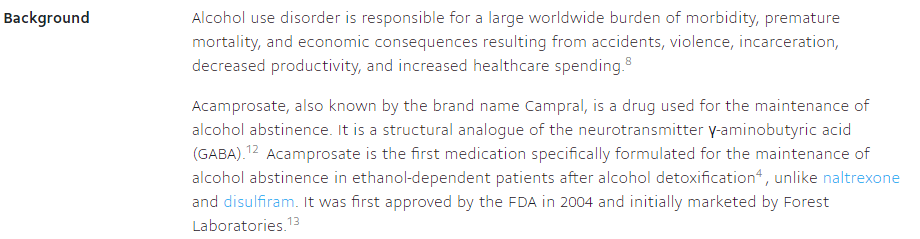

### < br > 

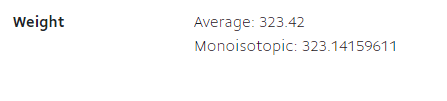

### < ul > contain < li > s

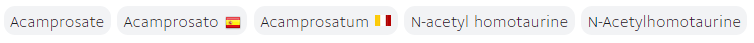

### < a > contain < li > s

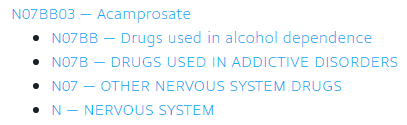

### < dl > contain < dt > < dd > s

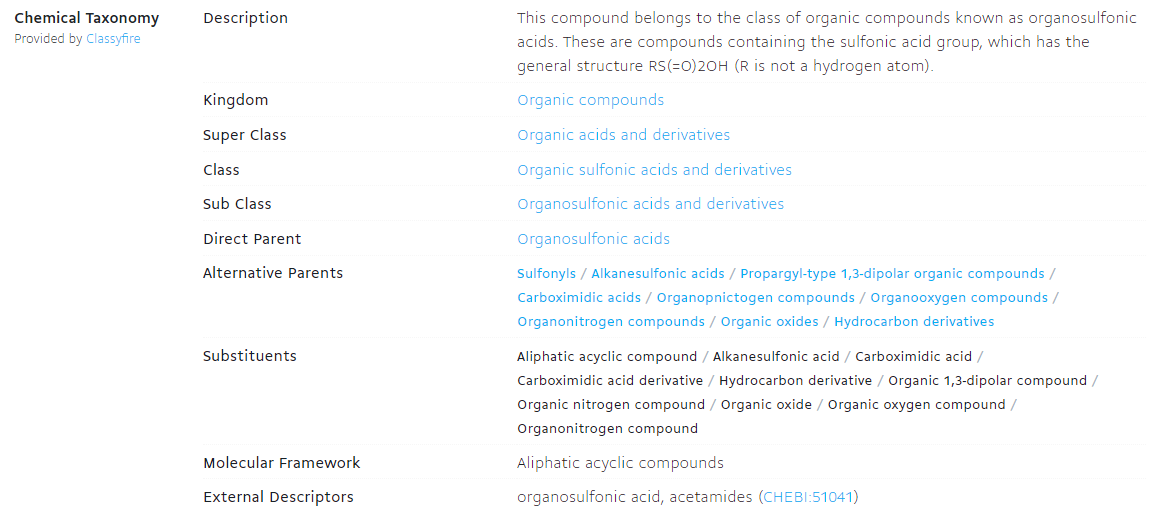

### < ul class="list-unstyled metabolite-pathway"

- Heaer < Span > 
- Sub < li > 
-  < a >

#### 1. < ul >

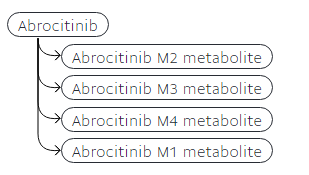

#### 2. < p > + < ul >

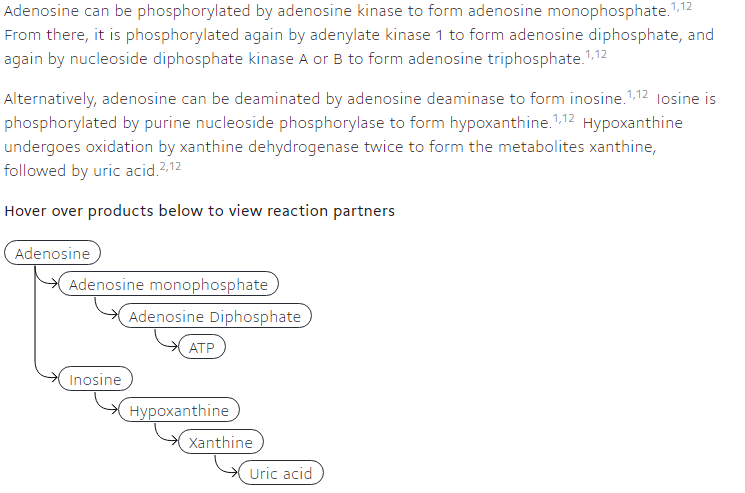

## Step 2 : < img >

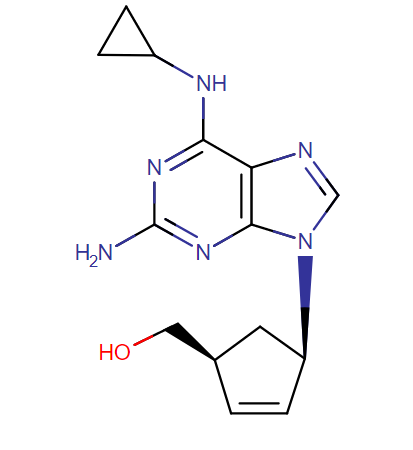\

 ### No Structure

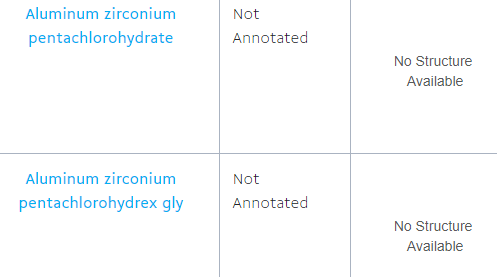

In [8]:
url = "https://go.drugbank.com/drugs/DB01048"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")

In [9]:
structure_info = soup.find('div', {'class': 'structure'}).find('a', {'class': 'moldbi-vector-thumbnail'})
structure_info

<a class="moldbi-vector-thumbnail" href="/structures/DB01048/image.svg"><img src="/structures/DB01048/thumb.svg"/></a>

In [10]:
structure_info.find('img').get('src')

'/structures/DB01048/thumb.svg'

In [11]:
structure_info.get('href')

'/structures/DB01048/image.svg'

### <span style="color:green"> Result </span>

In [12]:
structure_path = 'https://go.drugbank.com' + structure_info.get("href")
structure_path

'https://go.drugbank.com/structures/DB01048/image.svg'

## Step 3: < div 'class'='product-carousel-row'} < /div >

## Example drug:
- https://go.drugbank.com/drugs/DB01048
- https://go.drugbank.com/drugs/DB00659
- https://go.drugbank.com/drugs/DB00819
- https://go.drugbank.com/drugs/DB00316

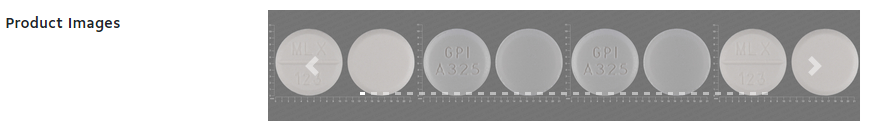
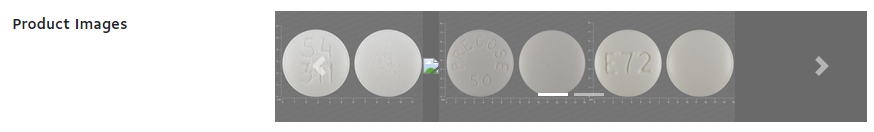
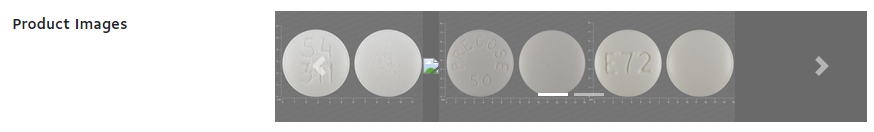
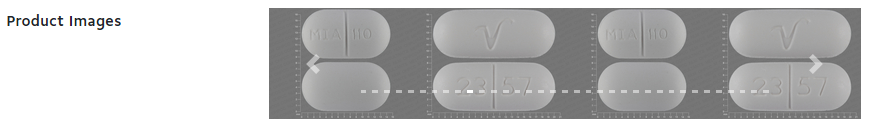
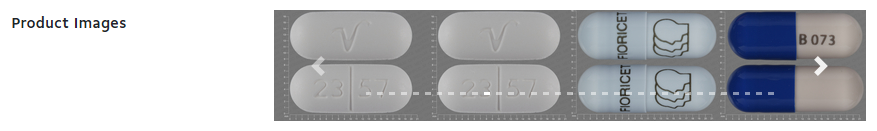
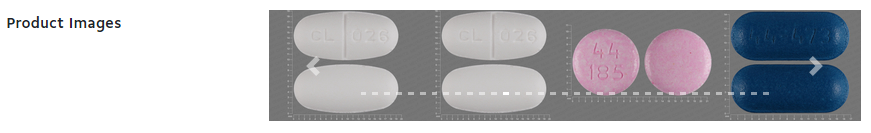

Example
----
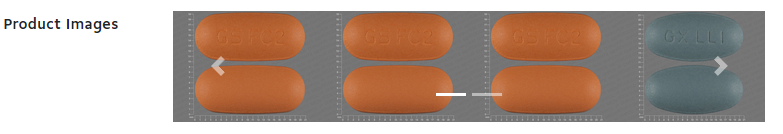
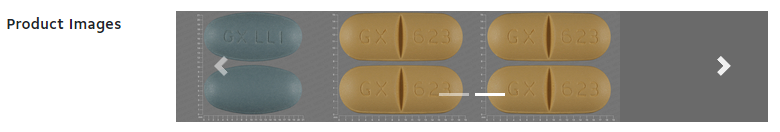

In [13]:
drug_name = soup.find('h1').text

print(drug_name)

product_images = [] 
for dd in  soup.find_all('dd', {'class': 'col-xl-10 col-md-9 col-sm-8'}):
    divs = dd.find_all('div')
    for div in divs:
        if div.get('id'):
            if div.get('id') == 'product-carousel-row':
                imgs = dd.find_all('img')
                for img in imgs:
                    image = img['src']
                    product_images.append(image)

Abacavir


In [14]:
product_images

['//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/54569-559420180907-15195-g6nyyq.jpg?1536301314',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0206-13_NLMIMAGE10_67193389.jpg?1498428323',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/50090-087420180913-8702-glwlgg.jpg?1536863625',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/53808-099020180907-15195-1wf0yq6.jpg?1536297287',
 '',
 '',
 '']

In [15]:
len(product_images)

7

### <span style="color:green"> Result </span>

In [16]:
for img in product_images: 
    display(Image(url=img, width=150))

### <span style="color:red"> To be Clicked </span>

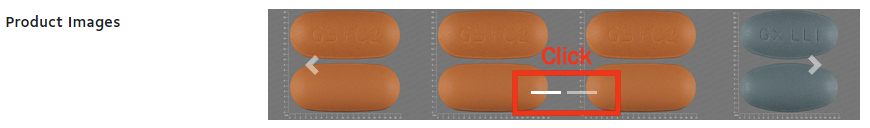

### Selenium

#### Step 1: Install Pakage

In [17]:
# pip install selenium

#### Step 2: Import Libraries

In [18]:
# from selenium import webdriver
# from selenium.webdriver import Firefox, Chrome, Edge
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait, Select
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementNotVisibleException
# from selenium.webdriver.support.wait import WebDriverWait

In [19]:
# browser = Chrome()
# browser.get("https://go.drugbank.com/drugs/DB01048")

#### Step 3: Create 1 Click Action

In [20]:
# product_image_next_xpath = '//*[@id="product-carousel"]/ol/li[2]'

In [21]:
# product_image_next_element = browser.find_element(By.XPATH, product_image_next_xpath)

In [22]:
# product_image_next_element.click()

#### Step 4: While loop click

In [29]:
%%time
browser = Chrome()
wait = WebDriverWait(browser, timeout=10)
browser.get("https://go.drugbank.com/drugs/DB01048")
product_image_next_xpath = '//*[@id="product-carousel"]/ol/li[2]'

new_product_images = [] 

old_html = browser.page_source
old_soup = BeautifulSoup(new_html)

CPU times: total: 141 ms
Wall time: 4.5 s


In [30]:
%%time
image_page = len(old_soup.find_all('li',{'data-target':'#product-carousel'}))
print(image_page)
rnd = 1
while rnd <= image_page :
    new_html = browser.page_source
    new_soup = BeautifulSoup(new_html)
    
    time.sleep(2)
    
    for dd in  new_soup.find_all('dd', {'class': 'col-xl-10 col-md-9 col-sm-8'}):
        divs = dd.find_all('div')
        for div in divs:
            if div.get('id'):
                if div.get('id') == 'product-carousel-row':
                    imgs = dd.find_all('img')
                    for img in imgs:
                        image = img['src']
                        if image not in new_product_images:
                            new_product_images.append(image)
    try:
        product_image_next_element = browser.find_element(By.XPATH, product_image_next_xpath)
        product_image_next_element.click()
        rnd += 1
    except NoSuchElementException:
        browser.quit()

2
CPU times: total: 125 ms
Wall time: 4.31 s


### <span style="color:green"> Result </span>

In [31]:
new_product_images

['//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/54569-559420180907-15195-g6nyyq.jpg?1536301314',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0206-13_NLMIMAGE10_67193389.jpg?1498428323',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/50090-087420180913-8702-glwlgg.jpg?1536863625',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/53808-099020180907-15195-1wf0yq6.jpg?1536297287',
 '',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0217-18_NLMIMAGE10_631931D9.jpg?1498428326',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/54569-488320180907-15195-115cqvk.jpg?1536299367',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0221-18_NLMIMAGE10_5F192FC9.jpg?1498428328']

In [32]:
len(new_product_images)

8

In [33]:
for img in new_product_images:
    display(Image(url=img, width=150))

## Step 4: 'Nested' table

### 4.1 Type 1

#### Example 1
---
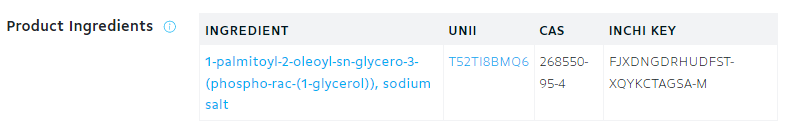



#### Example 2
---
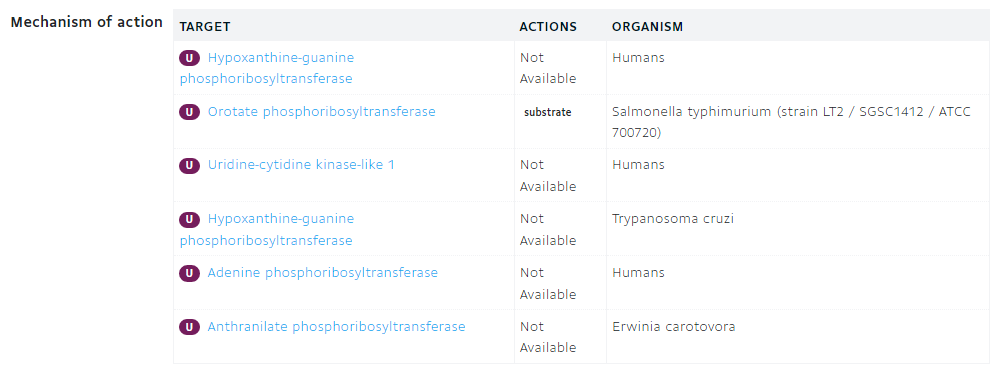

#### Example 3
---

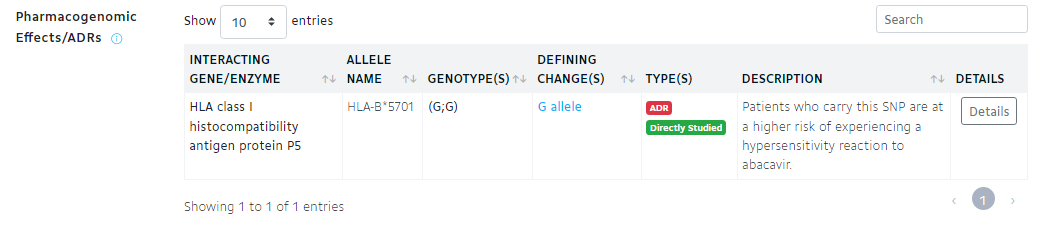

#### Example 4
---
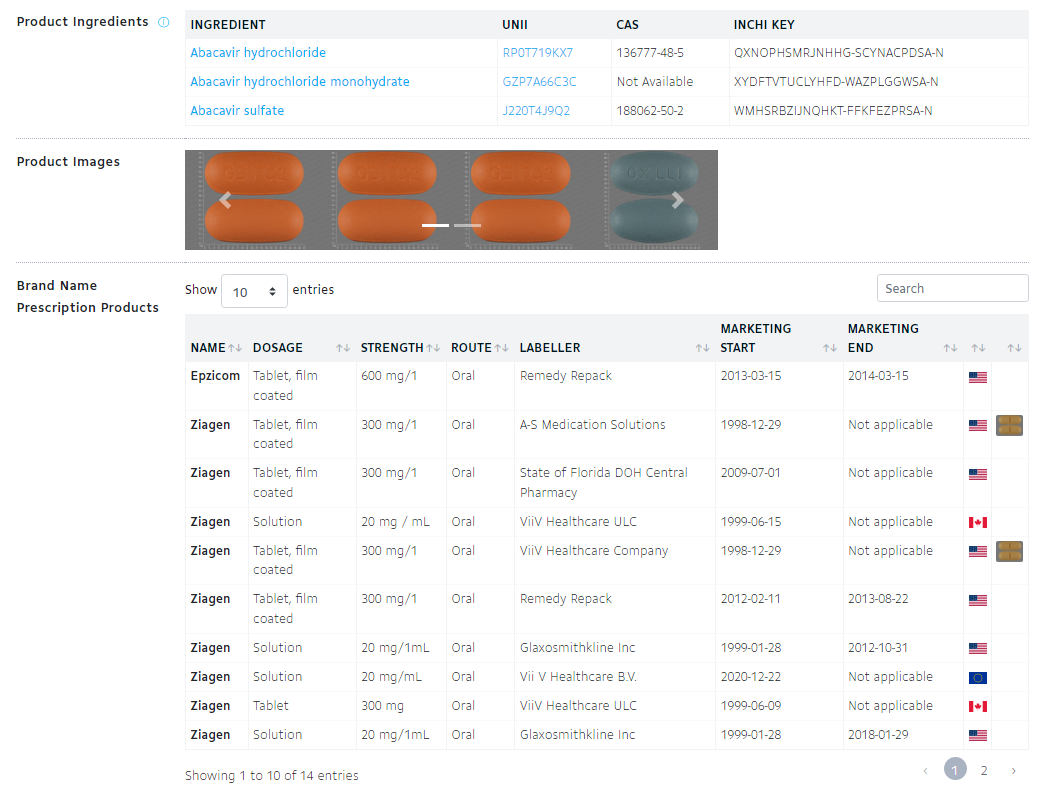

### Selenium 
- **What is selenium?**:
    - The selenium package is used to automate web browser interaction from Python.
- **Objective**: 
    - Create Action
        - Click 1-N pages automatically
- **Read more**:
    - https://www.selenium.dev/documentation/

#### Step 1: Install Pakage

In [34]:
# pip install selenium

#### Step 2: Import Libraries

In [35]:
# from selenium import webdriver
# from selenium.webdriver import Firefox, Chrome, Edge
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait, Select
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import NoSuchElementException, TimeoutException
# from selenium.webdriver.support.wait import WebDriverWait

#### Step 3: Browser Simulation

In [36]:
# browser = Chrome()
# browser.get("https://go.drugbank.com/drugs/DB01048")

### + Action

#### Step 4: Create 1 Click Action

In [37]:
# xpath = '//*[@id="drug-interactions-table_next"]/a'

In [38]:
# next_element = browser.find_element(By.XPATH, xpath)

In [39]:
# next_element.click()

#### Step 5: Get HTML page_soure

In [40]:
# html = browser.page_source

#### Step 6: Convert to BeautifulSoup

In [41]:
# s_soup = BeautifulSoup(html)

In [42]:
# s_soup

#### Step 7: While loop 5 clicks
- **Problem**:  browser need 'time' to find element in HTML
- **Solve**:  `time.sleep(2)`

In [43]:
# browser = Chrome()
# browser.get("https://go.drugbank.com/drugs/DB01048")

In [44]:
# iteration = 0
# xpath = '//*[@id="drug-interactions-table_next"]/a'
# nextElement = browser.find_element(By.XPATH, xpath)
# wait = WebDriverWait(browser, timeout=10)
# while iteration <= 5 :
#     # time.sleep(2)
#     next_element = wait.until(EC.visibility_of_element_located((By.XPATH, xpath)))
#     nextElement.click()
#     iteration += 1

### Test Action

In [45]:
# browser = Chrome()
# browser.get("https://go.drugbank.com/drugs/DB01048")

In [46]:
%%time
browser = Chrome()
browser.get("https://go.drugbank.com/drugs/DB01048")

wait = WebDriverWait(browser, timeout=10)

xpath = '//*[@id="drug-interactions-table_next"]/a'
html = browser.page_source
s_soup = BeautifulSoup(html)
table = s_soup.find('table',{'id':'drug-interactions-table'})

keys=[]
for k in table.find_all('th'):
    key = k.text.replace('\n','').lower().replace(' ', '_').replace('-','_')
    if key != 'integrate_drug_drug_interactions_in_your_software':
        keys.append(key)
print(keys)
subDict = []

['drug', 'interaction']
CPU times: total: 46.9 ms
Wall time: 6.38 s


In [47]:
subDict.clear()

#### While True 1 Table (Page 1-N)

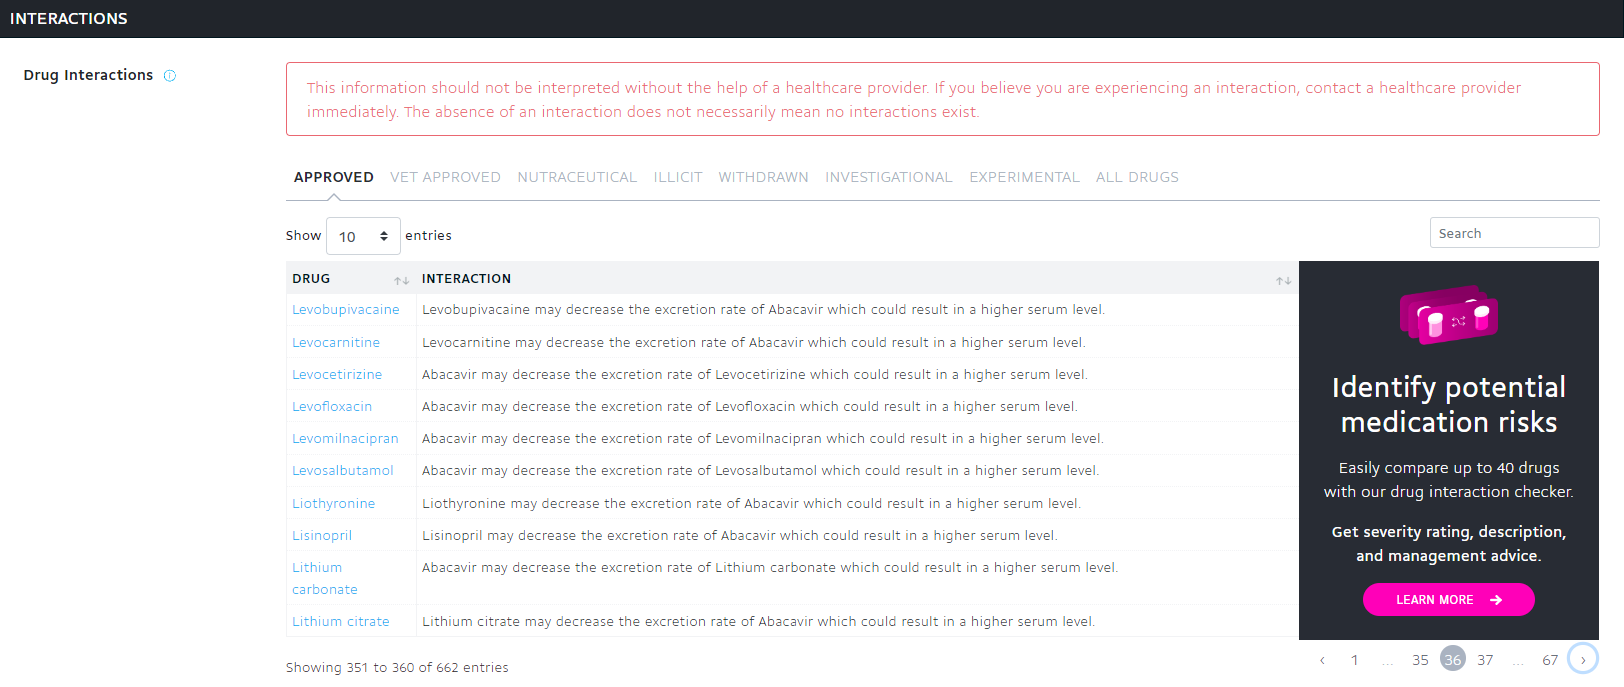

In [48]:
%%time
i = 1

while True:
    range_ = [n for n in range(101)[::20]]
    if i in range_:
        print('Page:',i)
        
    
    new_html = browser.page_source
    new_soup = BeautifulSoup(new_html)
    time.sleep(1)
    table = new_soup.find('table',{'id':'drug-interactions-table'}).find('tbody')
    values = []
    
    for v in table.find_all('tr'):
        k = 0
        k_value = []
        for k in range(len(keys)):
            value = v.find_all('td')[k]
            k_value.append(value.text)
            k += 1
        d = dict(zip(keys,k_value))
        subDict.append(d)

    try:
        next_element = wait.until(EC.visibility_of_element_located((By.XPATH, xpath)))
        next_element.click()
        i += 1
        
    except:
        browser.quit()
        break

Page: 20
Page: 40
Page: 60
CPU times: total: 4.61 s
Wall time: 1min 18s


In [49]:
len(subDict)

670

#### <span style="color:green"> Result </span>

In [ ]:
subDict

#### Convert to Pandas dataFrame

In [51]:
df = pd.DataFrame(subDict)

In [52]:
df

,drug,interaction
0,Aceclofenac,Aceclofenac may decrease the excretion rate of...
1,Acemetacin,Acemetacin may decrease the excretion rate of ...
2,Acetaminophen,Acetaminophen may decrease the excretion rate ...
3,Acetazolamide,Acetazolamide may increase the excretion rate ...
4,Acetylsalicylic acid,Acetylsalicylic acid may decrease the excretio...
...,...,...
665,Viloxazine,Abacavir may decrease the excretion rate of Vi...
666,Vortioxetine,Abacavir may decrease the excretion rate of Vo...
667,Warfarin,Abacavir may decrease the excretion rate of Wa...
668,Yellow fever vaccine,The therapeutic efficacy of Yellow fever vacci...


### 4.2 Type 2
h3: ('Targets', 'Enzymes', 'Carriers', 'Transporters')

https://go.drugbank.com/drugs/DB01048

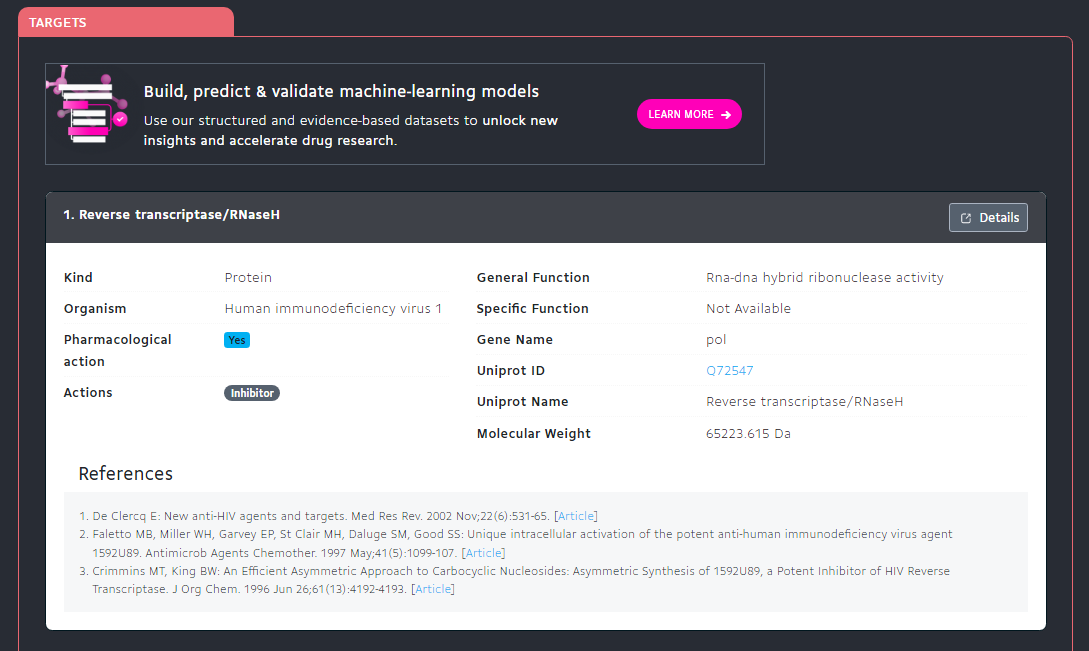

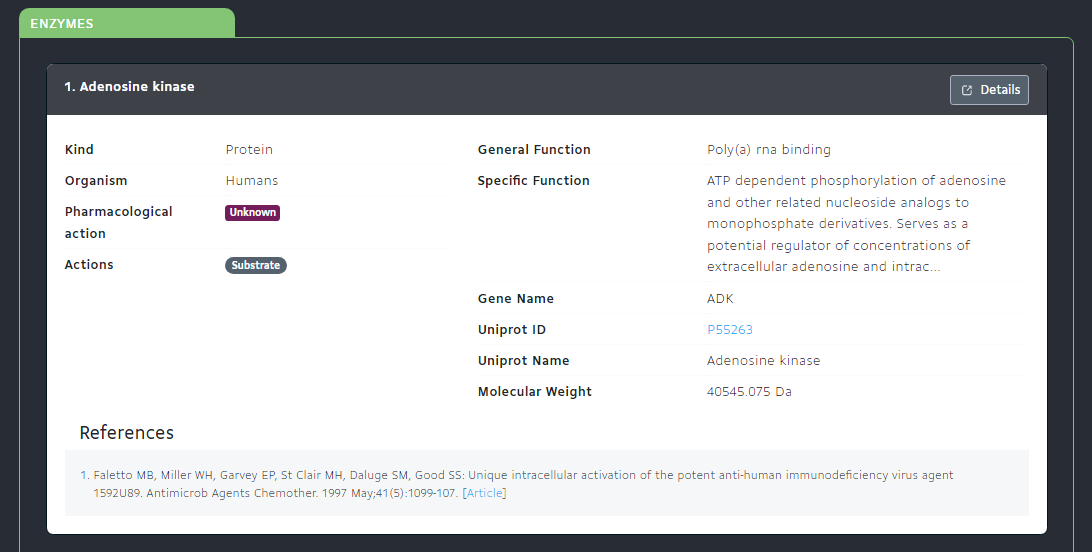

#### h3 HTML is type of these tables

In [53]:
h3s = []
for h3 in soup.find_all('div',{'class':'bond-list-container'}):
    print(h3.get('id'))
    h3s.append(h3)
print(len(h3s))

targets
enzymes
2


In [54]:
subDict2 = []

In [55]:
subDict2.clear()

#### Retrieve content in each tables

In [56]:
for h3 in soup.find_all('div',{'class':'bond-list-container'}):
    header = h3.get('id')
    bond_cards = h3.find_all('div',{'class':'bond card'})
    d_bond_cards = []
    for bc in bond_cards:
        sub_header = bc.find('strong').text
        keys = []
        for k in bc.find_all('dt'):
            key = k.text.replace(' ', '_').lower()
            keys.append(key)
        values = []
        for v in bc.find_all('dd'):
            value = v.text
            values.append(value)
    
        d = dict(zip(keys,values))
        sh_d = {sub_header:d}
        d_bond_cards.append(sh_d)
    h_d = {header:d_bond_cards}
    subDict2.append(h_d)

In [57]:
d_bond_cards

[{'1. Adenosine kinase': {'kind': 'Protein',
   'organism': 'Humans',
   'pharmacological_action': 'Unknown',
   'actions': 'Substrate',
   'general_function': 'Poly(a) rna binding',
   'specific_function': 'ATP dependent phosphorylation of adenosine and other related nucleoside analogs to monophosphate derivatives. Serves as a potential regulator of concentrations of extracellular adenosine and intrac...',
   'gene_name': 'ADK',
   'uniprot_id': 'P55263',
   'uniprot_name': 'Adenosine kinase',
   'molecular_weight': '40545.075 Da'}},
 {'2. Alcohol dehydrogenase 6': {'kind': 'Protein',
   'organism': 'Humans',
   'pharmacological_action': 'Unknown',
   'actions': 'Substrate',
   'general_function': 'Zinc ion binding',
   'specific_function': 'Not Available',
   'gene_name': 'ADH6',
   'uniprot_id': 'P28332',
   'uniprot_name': 'Alcohol dehydrogenase 6',
   'molecular_weight': '39088.335 Da'}},
 {'3. UDP-glucuronosyltransferase 1-1': {'kind': 'Protein',
   'organism': 'Humans',
   'phar

In [61]:
t_enzymes = pd.DataFrame(h_d)

In [62]:
t_enzymes

,enzymes
0,"{'1. Adenosine kinase': {'kind': 'Protein', 'o..."
1,{'2. Alcohol dehydrogenase 6': {'kind': 'Prote...
2,{'3. UDP-glucuronosyltransferase 1-1': {'kind'...


#### <span style="color:green"> Result </span>

In [63]:
subDict2

[{'targets': [{'1. Reverse transcriptase/RNaseH': {'kind': 'Protein',
     'organism': 'Human immunodeficiency virus 1',
     'pharmacological_action': 'Yes',
     'actions': 'Inhibitor',
     'general_function': 'Rna-dna hybrid ribonuclease activity',
     'specific_function': 'Not Available',
     'gene_name': 'pol',
     'uniprot_id': 'Q72547',
     'uniprot_name': 'Reverse transcriptase/RNaseH',
     'molecular_weight': '65223.615 Da'}},
   {'2. HLA class I histocompatibility antigen, B-57 alpha chain': {'kind': 'Protein',
     'organism': 'Humans',
     'pharmacological_action': 'Unknown'}}]},
 {'enzymes': [{'1. Adenosine kinase': {'kind': 'Protein',
     'organism': 'Humans',
     'pharmacological_action': 'Unknown',
     'actions': 'Substrate',
     'general_function': 'Poly(a) rna binding',
     'specific_function': 'ATP dependent phosphorylation of adenosine and other related nucleoside analogs to monophosphate derivatives. Serves as a potential regulator of concentrations of 

# Drug Table

## Check all existing columns
by 15 drugs

In [72]:
%%time
drug_columns = []
for number in test_df.DrugBankAccessionNumber[:15]:
    url = "https://go.drugbank.com/drugs/"+str(number)
    req = requests.get(url)
    req.encoding = "utf-8"
    soup = BeautifulSoup(req.text, "html.parser")
    
    # h2
    for h2 in soup.find_all('h2'):
        h2_t = h2.text
        if h2_t not in drug_columns:
            drug_columns.append(h2_t)
            
    # h3 - targets, enzymes
    for h3 in soup.find_all('h3'):
        print(h3.text)
        h3_t = h3.text
        if h3_t not in drug_columns:
            drug_columns.append(h3_t)
            
    print(list(test_df.DrugBankAccessionNumber).index(number))
print('Completed')

0
Targets
Enzymes
1
2
3
Targets
4
5
6
Targets
7
Targets
Enzymes
8
Enzymes
9
Targets
10
Targets
Enzymes
Carriers
Transporters
11
Targets
Enzymes
Carriers
Transporters
12
Targets
Enzymes
Carriers
Transporters
13
Targets
Enzymes
Carriers
14
Completed
CPU times: total: 1.19 s
Wall time: 9.62 s


In [73]:
drug_columns

['Identification',
 'Pharmacology',
 'Interactions',
 'Products',
 'Categories',
 'Chemical Identifiers',
 'References',
 'Clinical Trials',
 'Pharmacoeconomics',
 'Properties',
 'Spectra',
 'Interested in using DrugBank in a commercial product or application?',
 'Stay up-to-date with the latest from DrugBank!',
 'Thank you for subscribing!',
 'Targets',
 'Enzymes',
 'Carriers',
 'Transporters']

In [ ]:
drug_columns = ['Identification',
 'Pharmacology',
 'Interactions',
 'Products',
 'Categories',
 'Chemical Identifiers',
 'References',
 'Clinical Trials',
 'Pharmacoeconomics',
 'Properties',
 'Spectra',
 'Targets',
 'Enzymes',
 'Carriers',
 'Transporters']

In [74]:
len(drug_columns)

18

## Code combination

In [75]:
 def get_driver():
    driver = webdriver.Chrome()
    driver.set_page_load_timeout(10)
    driver.implicitly_wait(10)
    return driver

In [76]:
def table_multiple_page(dr_number:str, table_id:str, table_content,section_header):
    t_content = table_content
    
    keys=[]
    for k in t_content.find_all('th'):
        key = k.text.replace('\n','').lower().replace(' ', '_').replace('-','_')
        if key != 'integrate_drug_drug_interactions_in_your_software':
            keys.append(key)
  
    
    subDict = []
    if table_id:
        pagination = t_content.find('ul')
        if table_id:
            browser = Chrome()
            browser.maximize_window()
            wait = WebDriverWait(browser, timeout=10)
            browser.get(f"https://go.drugbank.com/drugs/{dr_number}#{section_header}")
            xpath = f'//*[@id="{table_id}_next"]/a'
            i = 1
            while True:
                
                range_ = [n for n in range(101)[1::10]]
                time.sleep(1)
                new_html = browser.page_source
                new_soup = BeautifulSoup(new_html)
                time.sleep(0.5)
                
                table = new_soup.find('table',{'id':f'{table_id}'}).find('tbody')

                if i in range_:
                    print('Page:',i)
                info = new_soup.find('div',{'class':'dataTables_info','id':f'{table_id}_info'})
                if info:
                    print(info.text)
                    
                values = []
                for v in table.find_all('tr'):
                    k = 0
                    k_value = []
                    for k in range(len(keys)):
                        value = v.find_all('td')[k]
                        k_value.append(value.text)
                        k += 1
                    d = dict(zip(keys,k_value))
                    subDict.append(d)
                
                try:
                    next_element = wait.until(EC.visibility_of_element_located((By.XPATH, xpath)))
                    next_element.click()
                    i += 1

                except:
                    browser.quit()
                    break
        else:
            values = []
            table =  t_content.find('table').find('tbody')

            for v in table.find_all('tr'):
                k = 0
                k_value = []
                for k in range(len(keys)):

                    value = v.find_all('td')[k]
                    k_value.append(value.text)
                    k += 1
                d = dict(zip(keys,k_value))
                subDict.append(d)
            
    else:
        values = []
        table =  t_content.find('table').find('tbody')

        for v in table.find_all('tr'):
            k = 0
            k_value = []
            for k in range(len(keys)):
            
                value = v.find_all('td')[k]
                k_value.append(value.text)
                k += 1
            d = dict(zip(keys,k_value))
            subDict.append(d)
    return subDict

In [77]:
def image_multiple_page(dr_number:str, content, section_header):
    
    driver = get_driver()
    url = f"https://go.drugbank.com/drugs/{dr_number}#{section_header}"
    driver.get(url)

    innerHTML = driver.execute_script('return document.body.innerHTML')
    soup = BeautifulSoup(innerHTML, 'lxml')
    
    time.sleep(2)
    
    xpath = '//*[@id="product-carousel"]/ol/li[2]'
    product_images = [] 
    
    image_page = len(content.find_all('li'))
    rnd = 1
    
    while rnd <= image_page :
        time.sleep(1)
        images_contents = soup.find('div', {'id' : 'product-carousel-row'})
        
        for img in images_contents.find_all('img'):
            image = img['src']
            if image:
                if image not in new_product_images:
                    product_images.append(image)
        
        try:
            product_image_next_element = driver.find_element(By.XPATH, product_image_next_xpath)
            product_image_next_element.click()
            rnd += 1
        except NoSuchElementException:
            browser.quit()
    return product_images

### Execution 
1 drug on DrugBankAccessionNumber = DB01048

In [82]:
%%time
drug_cat = []
drug_index = 0

for number in test_df.DrugBankAccessionNumber[8:9]:
    drug_index += 1
    
    driver = get_driver()
    url = f"https://go.drugbank.com/drugs/{number}"
    driver.get(url)

    innerHTML = driver.execute_script('return document.body.innerHTML')
    main_soup = BeautifulSoup(innerHTML, 'lxml')
    
    time.sleep(1)
    
    # Drug Informations
    dls = [dl for dl in main_soup.find_all('dl') if dl.get('class') == None]
    drug_name = main_soup.find('h1').text
    
    print('-'*100,f'\n({drug_index}) {drug_name} ({number})')
    
    main_keys = ['Name','DrugBankAccessionNumber']
    main_values = [drug_name,number]
    time.sleep(1)
    
    h2s = [h2 for h2 in main_soup.find_all('h2') if h2.get('id')]

    h3s = [h3.text for h3 in main_soup.find_all('h3')]

    for h2 in h2s:
        h2keys = []
        h2values = []
    
        h2_index = h2s.index(h2)
        for k in dls[h2_index].find_all('dt'):
            if k:
                key = k.get('id')
                h2keys.append(key)
            else:
                key = np.nan
                h2keys.append(key)
        for v in dls[h2_index].find_all('dd'):
            if v:
                if v.find('a', attrs={'class': 'locked-incopy track-link'}) == None:
                    if v.find('table'):
                        table_id = v.find('table').get('id')
                        header_section = h2.get('id')
                        if v.find('p'):
                            des_value = v.find('p').text
                            value = table_multiple_page(number,table_id, v, header_section)
                            p_table = {'description':des_value, table_id:value}
                            h2values.append(p_table)
                        else:
                            value = table_multiple_page(number,table_id, v, header_section)
                            d_table = {table_id:value}
                            h2values.append(d_table)

                    elif v.find('div', {'id' : 'product-carousel-row'}):
                        header_section = h2.get('id')
                        content = v.find('div', {'id' : 'product-carousel-row'})
                        value = image_multiple_page(number,content, header_section)
                        h2values.append(value)

                    elif v.find('img'):
                        structure_path = 'https://go.drugbank.com' + v.find('img').get('src')
                        h2values.append(structure_path)


                    elif v.find('dl'):
                        dt_keys = []
                        for dt in v.find_all('dt'):
                            dt_keys.append(dt.text)

                        dd_values = []
                        for dd in v.find_all('dd'):
                            dd_values.append(dd.text)
                        d = dict(zip(dt_keys,dd_values))
                        h2values.append(d)
                    elif v.find('a'):
                        a_keys = []
                        for a in v.find_all('a'):
                            a_keys.append(a.text)
                        li_values = []
                        for li in v.find_all('li'):
                            li_values.append(li.text)
                        d = dict(zip(a_keys,li_values))
                        h2values.append(d)

                    elif v.find('ul'):
                        li_s = [li.text for li in v.find_all('li')]
                        h2values.append(li_s)

                    elif v.find('ul', attrs={'class': 'list-unstyled metabolite-pathway'}):
                        if v.find('p'):
                            paragraphs = []
                            for p in v.find_all('p'):
                                paragraphs.append(p.text)
                            spans = []
                            for span in v.find_all('span', attrs={'class': 'metabolite'}):
                                spans.append(span.text)
                            a_s = []
                            for a in v.find_all("a"):
                                a_s.append(a.text)

                            d = dict(zip(spans,a_s))
                            d_p = {'Description':paragraphs,'metabolite':d}
                            h2values.append(d_p)

                        else:
                            spans = []
                            for span in v.find_all('span', attrs={'class': 'metabolite'}):
                                spans.append(span.text)
                            a_s = []
                            for a in v.find_all("a"):
                                a_s.append(a.text)
                            d = dict(zip(spans,a_s))
                            h2values.append(d)
                    elif v.find('br'):
                        h2values.append(v.text)
                    else:
                        value = v.text
                        h2values.append(value)
                else:
                    
                    title = v.find('div', attrs={'class': 'title'})
                    subtitle =  v.find('div', attrs={'class': 'subtitle'})
                    if title and subtitle:
                        d = {'title':title.text,'subtitle':subtitle.text}
                        h2values.append(d)
                    elif title:
                        h2values.append(title.text)
                    else:
                        h2values.append(np.nan)
                        
            # Empty value
            else:
                h2values.append(np.nan)
        
        h2_sub_dict = dict(zip(h2keys,h2values))
        main_keys.append(h2.text)
        main_values.append(h2_sub_dict)
    # h3
    for h3 in main_soup.find_all('div',{'class':'bond-list-container'}):
        header = h3.get('id')

        bond_cards = h3.find_all('div',{'class':'bond card'})
        d_bond_cards = []
        for bc in bond_cards:
            sub_header = bc.find('strong').text
            h3keys = []
            for k in bc.find_all('dt'):
                key = k.text.replace(' ', '_').lower()
                h3keys.append(key)
            h3values = []
            for v in bc.find_all('dd'):
                value = v.text
                h3values.append(value)

            d = dict(zip(h3keys,h3values))
            sh_d = {sub_header:d}
            d_bond_cards.append(sh_d)
        main_keys.append(header)
        main_values.append(d_bond_cards)
    range_ = [i for i in range(1,len(test_df),100)]
    if drug_index in range_:
        print(drug_index)
    print('Main Keys:',len(main_keys))
    print('Main Values:',len(main_values))
    drug_dict = dict(zip(main_keys,main_values))
    
    drug_cat.append(drug_dict)    
print('Completed Scraping')

---------------------------------------------------------------------------------------------------- 
(1) Abacavir (DB01048)
Page: 1
Page: 1
Page: 1
Showing 1 to 10 of 662 entries
Showing 11 to 20 of 662 entries
Showing 21 to 30 of 662 entries
Showing 31 to 40 of 662 entries
Showing 41 to 50 of 662 entries
Showing 51 to 60 of 662 entries
Showing 61 to 70 of 662 entries
Showing 71 to 80 of 662 entries
Showing 81 to 90 of 662 entries
Showing 91 to 100 of 662 entries
Page: 11
Showing 101 to 110 of 662 entries
Showing 111 to 120 of 662 entries
Showing 121 to 130 of 662 entries
Showing 131 to 140 of 662 entries
Showing 141 to 150 of 662 entries
Showing 151 to 160 of 662 entries
Showing 161 to 170 of 662 entries
Showing 171 to 180 of 662 entries
Showing 181 to 190 of 662 entries
Showing 191 to 200 of 662 entries
Page: 21
Showing 201 to 210 of 662 entries
Showing 211 to 220 of 662 entries
Showing 221 to 230 of 662 entries
Showing 231 to 240 of 662 entries
Showing 241 to 250 of 662 entries
Sho

### Convert to Pandas DataFrame

In [84]:
drugs_cat = pd.DataFrame(drug_cat)

In [85]:
drugs_cat

,Name,DrugBankAccessionNumber,Identification,Pharmacology,Interactions,Products,Categories,Chemical Identifiers,References,Clinical Trials,Pharmacoeconomics,Properties,Spectra,targets,enzymes
0,Abacavir,DB01048,{'summary': 'Abacavir is an antiviral nucleosi...,{'indication': {'title': 'Reduce drug developm...,{'drug-interactions': {'drug-interactions-tabl...,{None: {'title': 'Drug product information fro...,"{'atc-codes': {'J05AR13 — Lamivudine, abacavir...","{'unii': {}, 'cas-number': '136470-78-5', 'inc...","{'synthesis-reference': {}, 'general-reference...","{'clinical-trials': {None: [{'phase': '4', 'st...","{'manufacturers': 'Not Available', 'packagers'...","{'state': 'Solid', 'experimental-properties': ...","{'mass-spec': 'Not Available', 'spectra': {'sp...",[{'1. Reverse transcriptase/RNaseH': {'kind': ...,"[{'1. Adenosine kinase': {'kind': 'Protein', '..."


## Check If execution code is included all drug contents

In [86]:
drugs_cat['Pharmacology'][0]

{'indication': {'title': 'Reduce drug development failure rates',
  'subtitle': 'Build, train, & validate machine-learning modelswith evidence-based and structured datasets.'},
 'associated-conditions': {'Human Immunodeficiency Virus Type 1 (HIV-1) Infection': 'Human Immunodeficiency Virus Type 1 (HIV-1) Infection'},
 'contraindications-blackbox-warnings': {'title': 'Avoid life-threatening adverse drug events',
  'subtitle': 'Improve clinical decision support with information on contraindications & blackbox warnings, population restrictions, harmful risks, & more.'},
 'pharmacodynamics': 'Abacavir is a nucleoside reverse transcriptase inhibitor (NRTI) with activity against Human Immunodeficiency Virus Type 1 (HIV-1). Abacavir is phosphorylated to active metabolites that compete for incorporation into viral DNA. They inhibit the HIV reverse transcriptase enzyme competitively and act as a chain terminator of DNA synthesis. The concentration of drug necessary to effect viral replication b

In [87]:
drugs_cat['Products'][0]

{None: {'title': 'Drug product information from 10+ global regions',
  'subtitle': 'Our datasets provide approved product information including:dosage, form, labeller, route of administration, and marketing period.'},
 'product-ingredients': {'drug-salts-table': [{'ingredient': 'Abacavir hydrochloride',
    'unii': 'RP0T719KX7',
    'cas': '136777-48-5',
    'inchi_key': 'QXNOPHSMRJNHHG-SCYNACPDSA-N'},
   {'ingredient': 'Abacavir hydrochloride monohydrate',
    'unii': 'GZP7A66C3C',
    'cas': 'Not Available',
    'inchi_key': 'XYDFTVTUCLYHFD-WAZPLGGWSA-N'},
   {'ingredient': 'Abacavir sulfate',
    'unii': 'J220T4J9Q2',
    'cas': '188062-50-2',
    'inchi_key': 'WMHSRBZIJNQHKT-FFKFEZPRSA-N'}]},
 'product-images': [],
 'brand-name-prescription-products': {'approved-products': [{'name': 'Epzicom',
    'dosage': 'Tablet, film coated',
    'strength': '600 mg/1',
    'route': 'Oral',
    'labeller': 'Remedy Repack',
    'marketing_start': '2013-03-15',
    'marketing_end': '2014-03-15',


In [88]:
drugs_cat['Interactions'][0]

{'drug-interactions': {'drug-interactions-table': [{'drug': 'Aceclofenac',
    'interaction': 'Aceclofenac may decrease the excretion rate of Abacavir which could result in a higher serum level.'},
   {'drug': 'Acemetacin',
    'interaction': 'Acemetacin may decrease the excretion rate of Abacavir which could result in a higher serum level.'},
   {'drug': 'Acetaminophen',
    'interaction': 'Acetaminophen may decrease the excretion rate of Abacavir which could result in a higher serum level.'},
   {'drug': 'Acetazolamide',
    'interaction': 'Acetazolamide may increase the excretion rate of Abacavir which could result in a lower serum level and potentially a reduction in efficacy.'},
   {'drug': 'Acetylsalicylic acid',
    'interaction': 'Acetylsalicylic acid may decrease the excretion rate of Abacavir which could result in a higher serum level.'},
   {'drug': 'Aclidinium',
    'interaction': 'Abacavir may decrease the excretion rate of Aclidinium which could result in a higher serum l

In [89]:
drugs_cat['Identification'][0]

{'summary': 'Abacavir is an antiviral nucleoside reverse transcriptase inhibitor used in combination with other antiretrovirals for the treatment of HIV.',
 'brand-names': 'Epzicom, Kivexa, Triumeq, Trizivir, Ziagen',
 'generic-name': 'Abacavir',
 'drugbank-accession-number': 'DB01048',
 'background': 'Abacavir (ABC) is a powerful nucleoside analog reverse transcriptase inhibitor (NRTI) used to treat HIV and AIDS. Chemically, it is a synthetic carbocyclic nucleoside and is the enantiomer with 1S, 4R absolute configuration on the cyclopentene ring. In vivo, abacavir sulfate dissociates to its free base, abacavir.\n',
 'type': 'Small Molecule',
 'groups': 'Approved, Investigational',
 'structure': 'https://go.drugbank.com/structures/DB01048/thumb.svg',
 'weight': 'Average: 286.3323 Monoisotopic: 286.154209228 ',
 'chemical-formula': 'C14H18N6O',
 'synonyms': ['{(1S-cis)-4-[2-amino-6-(cyclopropylamino)-9H-purin-9-yl]cyclopent-2-en-1-yl}methanol',
  'Abacavir',
  'ABC '],
 'external-ids': 

In [90]:
drugs_cat['Pharmacology'][0]

{'indication': {'title': 'Reduce drug development failure rates',
  'subtitle': 'Build, train, & validate machine-learning modelswith evidence-based and structured datasets.'},
 'associated-conditions': {'Human Immunodeficiency Virus Type 1 (HIV-1) Infection': 'Human Immunodeficiency Virus Type 1 (HIV-1) Infection'},
 'contraindications-blackbox-warnings': {'title': 'Avoid life-threatening adverse drug events',
  'subtitle': 'Improve clinical decision support with information on contraindications & blackbox warnings, population restrictions, harmful risks, & more.'},
 'pharmacodynamics': 'Abacavir is a nucleoside reverse transcriptase inhibitor (NRTI) with activity against Human Immunodeficiency Virus Type 1 (HIV-1). Abacavir is phosphorylated to active metabolites that compete for incorporation into viral DNA. They inhibit the HIV reverse transcriptase enzyme competitively and act as a chain terminator of DNA synthesis. The concentration of drug necessary to effect viral replication b

In [91]:
drugs_cat['References'][0]

{'synthesis-reference': {},
 'general-references': {'Article': 'Zucman D, Truchis Pd, Majerholc C, Stegman S, Caillat-Zucman S: Prospective screening for human leukocyte antigen-B*5701 avoids abacavir hypersensitivity reaction in the ethnically mixed French HIV population. J Acquir Immune Defic Syndr. 2007 May 1;45(1):1-3. [Article] ',
  'Link': 'FDA Approved Drug Products: Ziagen (abacavir) for oral administration [Link] '},
 'external-links': {'Human Metabolome Database': 'HMDB0015182',
  'KEGG Drug': 'D07057',
  'KEGG Compound': 'C07624',
  'PubChem Compound': '441300',
  'PubChem Substance': '46505718',
  'ChemSpider': '390063',
  'BindingDB': '50366816',
  'RxNav': '190521',
  'ChEBI': '421707',
  'ChEMBL': 'CHEMBL1380',
  'ZINC': 'ZINC000002015928',
  'Therapeutic Targets Database': 'DAP000704',
  'PharmGKB': 'PA448004',
  'PDBe Ligand': '1KX',
  'RxList': 'RxList Drug Page',
  'Drugs.com': 'Drugs.com Drug Page',
  'PDRhealth': 'PDRhealth Drug Page',
  'Wikipedia': 'Abacavir'},
 

### json_normalize " Interactions " 

In [92]:
dr_interactions = pd.json_normalize(drugs_cat['Products'])

In [93]:
dr_interactions

,product-images,None.title,None.subtitle,product-ingredients.drug-salts-table,brand-name-prescription-products.approved-products,generic-prescription-products.generic-products,mixture-products.None
0,[],Drug product information from 10+ global regions,Our datasets provide approved product informat...,"[{'ingredient': 'Abacavir hydrochloride', 'uni...","[{'name': 'Epzicom', 'dosage': 'Tablet, film c...","[{'name': 'Abacavir', 'dosage': 'Tablet, film ...","[{'name': 'Abacavir and lamivudine', 'ingredie..."


### json_normalize " Identification " 

In [96]:
drugs_cat['Identification']

0    {'summary': 'Abacavir is an antiviral nucleosi...
Name: Identification, dtype: object

In [97]:
dr_identification = pd.json_normalize(drugs_cat['Identification'])
dr_identification

,summary,brand-names,generic-name,drugbank-accession-number,background,type,groups,structure,weight,chemical-formula,synonyms,external-ids
0,Abacavir is an antiviral nucleoside reverse tr...,"Epzicom, Kivexa, Triumeq, Trizivir, Ziagen",Abacavir,DB01048,Abacavir (ABC) is a powerful nucleoside analog...,Small Molecule,"Approved, Investigational",https://go.drugbank.com/structures/DB01048/thu...,Average: 286.3323 Monoisotopic: 286.154209228,C14H18N6O,[{(1S-cis)-4-[2-amino-6-(cyclopropylamino)-9H-...,[1592U89]


In [98]:
dr_identification['weight'][0]

'Average: 286.3323 Monoisotopic: 286.154209228 '

In [99]:
drugs_cat.columns

Index(['Name', 'DrugBankAccessionNumber', 'Identification', 'Pharmacology',
       'Interactions', 'Products', 'Categories', 'Chemical Identifiers',
       'References', 'Clinical Trials', 'Pharmacoeconomics', 'Properties',
       'Spectra', 'targets', 'enzymes'],
      dtype='object')

In [100]:
drugs_cat

,Name,DrugBankAccessionNumber,Identification,Pharmacology,Interactions,Products,Categories,Chemical Identifiers,References,Clinical Trials,Pharmacoeconomics,Properties,Spectra,targets,enzymes
0,Abacavir,DB01048,{'summary': 'Abacavir is an antiviral nucleosi...,{'indication': {'title': 'Reduce drug developm...,{'drug-interactions': {'drug-interactions-tabl...,{None: {'title': 'Drug product information fro...,"{'atc-codes': {'J05AR13 — Lamivudine, abacavir...","{'unii': {}, 'cas-number': '136470-78-5', 'inc...","{'synthesis-reference': {}, 'general-reference...","{'clinical-trials': {None: [{'phase': '4', 'st...","{'manufacturers': 'Not Available', 'packagers'...","{'state': 'Solid', 'experimental-properties': ...","{'mass-spec': 'Not Available', 'spectra': {'sp...",[{'1. Reverse transcriptase/RNaseH': {'kind': ...,"[{'1. Adenosine kinase': {'kind': 'Protein', '..."


## Timing Performance

In [102]:
print('Total %d\n10 items = 5.82 s\n(%d times x 5.82s)/60'%(len(test_df),(len(test_df)/10)),'\n≈',((len(test_df)/10)*5.82)/60, 'mins')

Total 2739
10 items = 5.82 s
(273 times x 5.82s)/60 
≈ 26.5683 mins


# Export to CSV 

In [ ]:
# data.to_csv('drugBank.csv', index= False)